# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [129]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

# project was done in windows OS using VScode and anaconda environment

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

### Understanding the structure of the data

In [130]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [131]:
# Write your code here to read the data
fh_original = pd.read_csv("foodhub_order.csv") # read the data from the CSV file


In [132]:
# Write your code here to view the first 5 rows
fh_original.head(5) # display the first 5 rows of the DataFrame

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [133]:
# Write your code here
print(f"Total rows in the data: {fh_original.shape[0]}")
print(f"Total columns in the data: {fh_original.shape[1]}")


Total rows in the data: 1898
Total columns in the data: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [134]:
# Write your code here
# loop through the columns and print the column name and its datatype
for column in fh_original.columns:
    print(f"Column name: {column} and datatype:  {fh_original[column].dtype}") 


# alternatively dataframe.info() can be used to get the column and datatype 
fh_original.info() # display the information about the DataFrame


Column name: order_id and datatype:  int64
Column name: customer_id and datatype:  int64
Column name: restaurant_name and datatype:  object
Column name: cuisine_type and datatype:  object
Column name: cost_of_the_order and datatype:  float64
Column name: day_of_the_week and datatype:  object
Column name: rating and datatype:  object
Column name: food_preparation_time and datatype:  int64
Column name: delivery_time and datatype:  int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-nu

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [135]:
# Write your code here


count_null = 0 
count_na = 0
column_null_value_dict = {}  # Initialize the dictionary to store missing values count
column_na_value_dict = {}  # Initialize the dictionary to store missing values count

# Loop through each column in the dataframe and check for null and NA values
for column in fh_original.columns:
    #print(f"Column name: {column} and datatype:  {fh_original[column].dtype}") 
    if fh_original[column].isnull().sum() > 0:
        count_null += 1
        missing_values_count = fh_original[column].isnull().sum()
        column_null_value_dict[column] = int(missing_values_count)
    missing_values_count = 0
    if fh_original[column].isna().sum() > 0:
        count_na += 1
        missing_values_count = fh_original[column].isna().sum()
        column_na_value_dict[column] = int(missing_values_count)


#loop through the dictionary and print the values        
print('----------NUll and NaN values are considered missing values ------------------')
print("\n")      
if not column_null_value_dict.items() :
    print('There are no null values in the data')
else:
    for column, missing_values_count in column_null_value_dict.items():
        print(f"{column} has these: {missing_values_count} null values")
        print("\n")      
   
if not column_na_value_dict.items() :
    print('There are no NaN values in the data')
else:
    for column, missing_values_count in column_na_value_dict.items():
        print(f"{column} has these: {missing_values_count} NaN values")
        print("\n")      
print('-----------------------------------------------------------------------------')  




# alternatively this command can be used get the null and NA values in the data
fh_original.isnull().sum() # display the number of null values in each column
fh_original.isna().sum() # display the number of NA values in each column



----------NUll and NaN values are considered missing values ------------------


There are no null values in the data
There are no NaN values in the data
-----------------------------------------------------------------------------


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [136]:
# Write your code here
print(f"Food preparation average time in seconds is  {round(fh_original['food_preparation_time'].describe().T.mean(),1)}")
print(f"Food preparation minimum time in seconds is  {round(fh_original.food_preparation_time.describe().T.min(),1)}")
print(f"Food preparation maximum time in seconds is  {round(fh_original.food_preparation_time.describe().max(),1)}")


Food preparation average time in seconds is  258.3
Food preparation minimum time in seconds is  4.6
Food preparation maximum time in seconds is  1898.0


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [137]:
#filter column rating for 'Not given' values and count the number of occurrences
#returns a series with the count of 'Not given' ratings

not_given = fh_original['rating'][fh_original['rating'] == 'Not given'].value_counts() # check the rating values
print(f"{not_given.values[0]} orders were not rated.")


736 orders were not rated.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

-----------------------------------------------------------------------------
order_id : Mean 1477495.5 is equal to median 1477495.5, the data is uniformly distributed or normally distributed
Graphical Representation of the Data


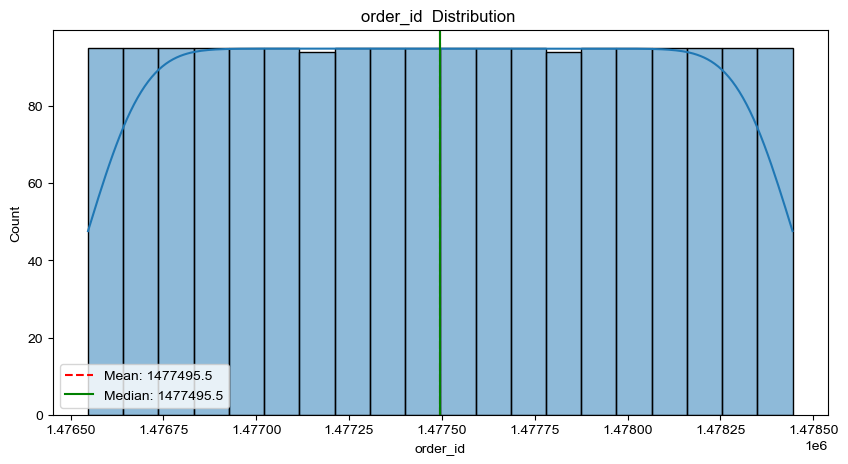

customer_id : Mean 171168.48 is greater than median 128600.0, the data is positively skewed or right skewed
Graphical Representation of the Data


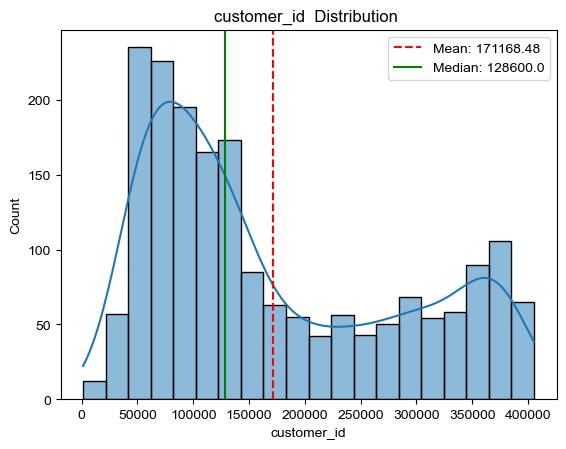

cost_of_the_order : Mean 16.5 is greater than median 14.14, the data is positively skewed or right skewed
Graphical Representation of the Data


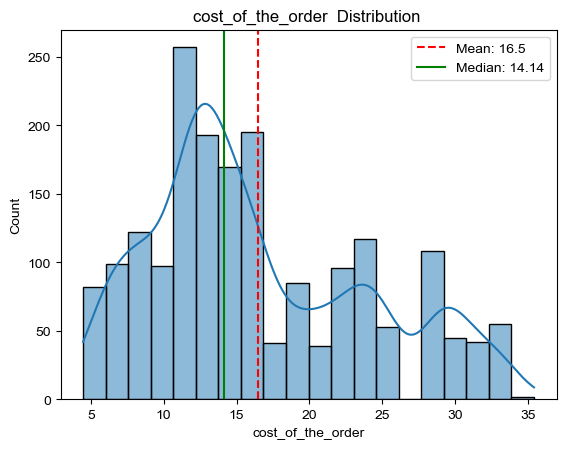

food_preparation_time : Mean 27.37 is greater than median 27.0, the data is positively skewed or right skewed
Graphical Representation of the Data


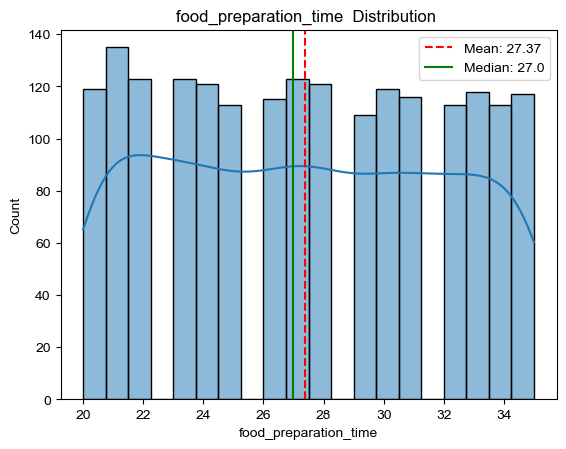

delivery_time : Mean 24.16 is less than median 25.0, the data is negatively skewed or left skewed
Graphical Representation of the Data


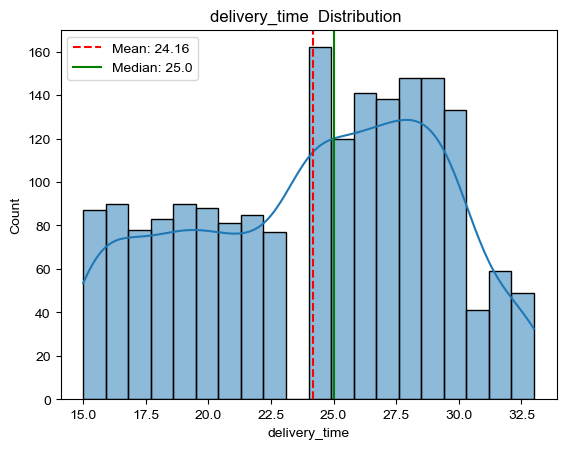

--------------------------Find outliers--------------------------------------
Columns cost_of_the_order, food_preparation_time, delivery_time have no outliers


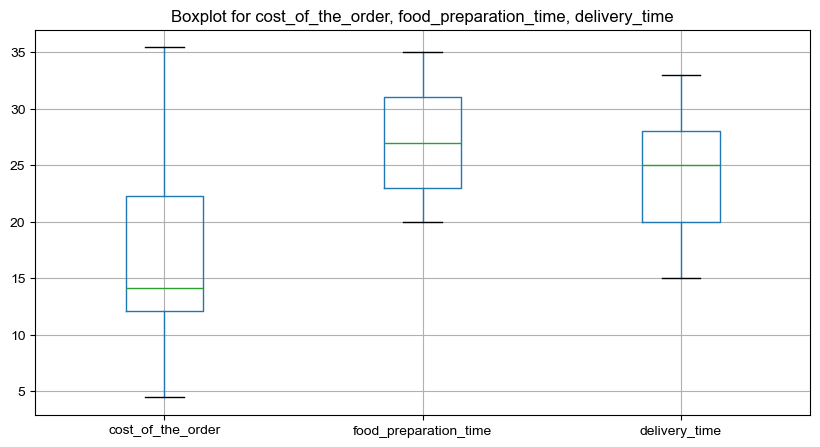

order id and customer id are unique identifiers box plot analyis is not required, however, it is done for the sake of completeness
Column Order_id has no outliers


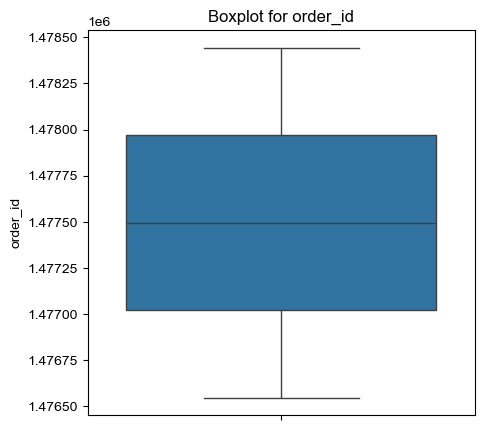

Column customer_id has no outliers


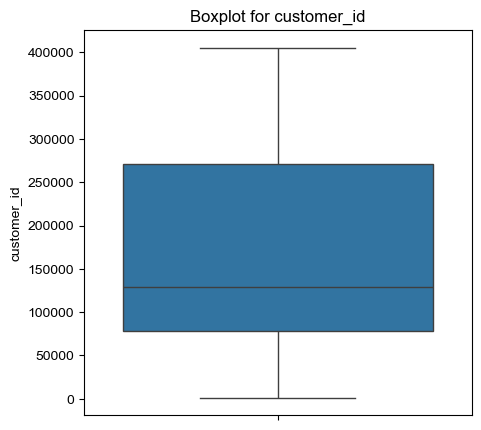

Categorical columns are cusine type, day of the week and rating 
Restaurant name is not considered category as it does not summerize the information, however analysis is provided for the sake of completeness
-----------------------------------------------------------------------------


d:\PythonEngine\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\PythonEngine\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


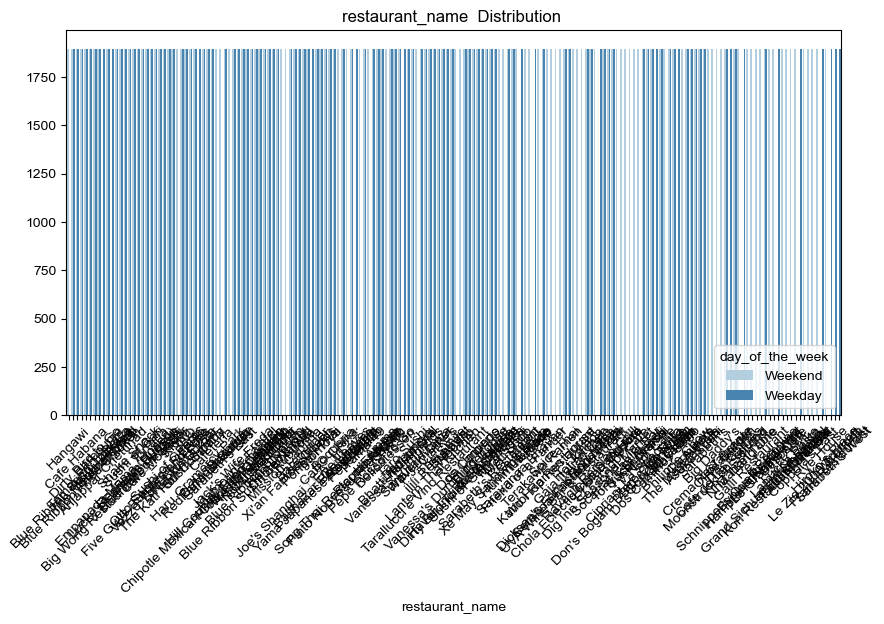

-----------------------------------------------------------------------------


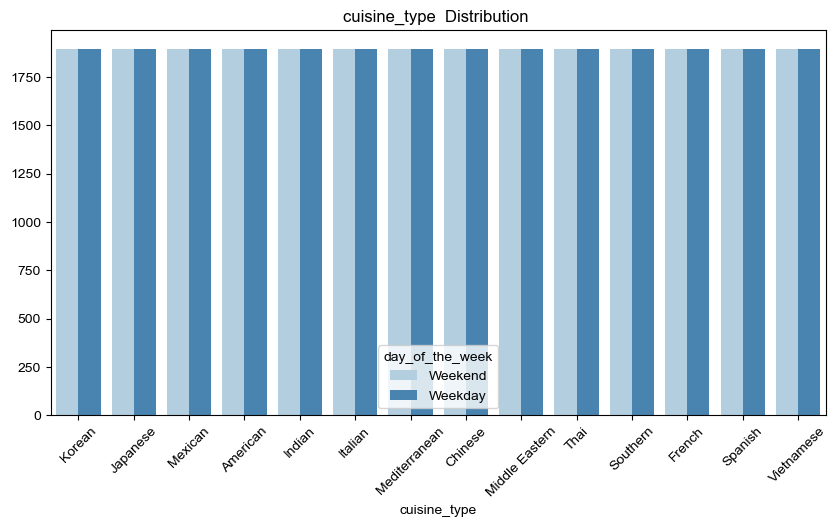

-----------------------------------------------------------------------------


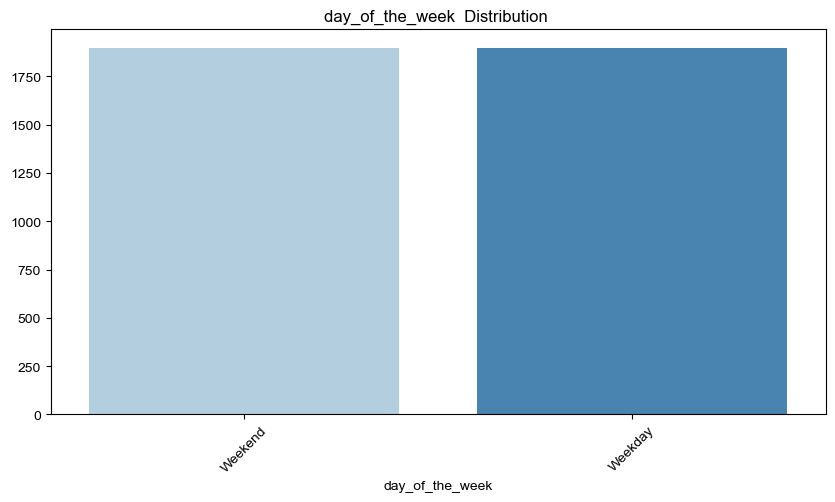

-----------------------------------------------------------------------------


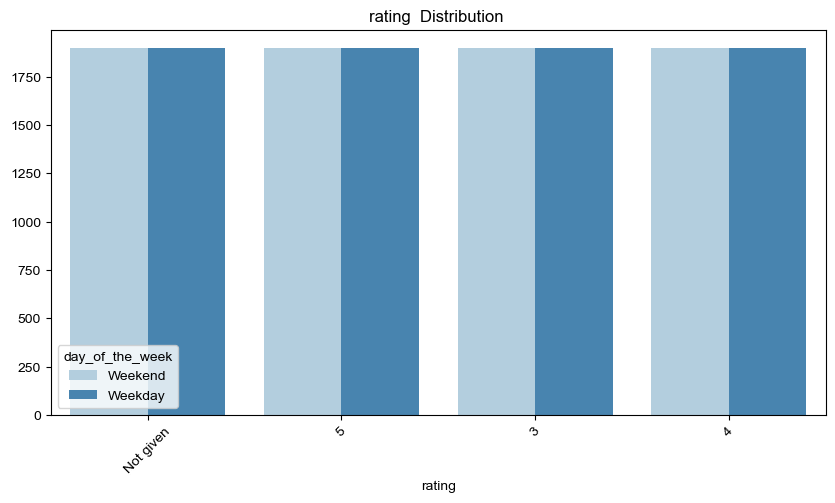

In [138]:
# distributions for numerial columns,distribution is measured with mean, median, mode 
#charts --> histograms,histogram with density cure, boxplots,bar graph, line   and scatterplots
# calculate the mean, median, and mode for all numerical columns in the dataframe
# Loop through all numerical columns and calculate mean, median, and mode

plt.figure(figsize=(10, 5))
print('-----------------------------------------------------------------------------')
for column in fh_original.select_dtypes(include=['number']).columns:
    mean_value = round(fh_original[column].mean(), 2)
    median_value = fh_original[column].median()
    mode_value = fh_original[column].mode()[0]
    match mean_value:
        case _ if mean_value > median_value:
            print(f"{column} : Mean {mean_value} is greater than median {median_value}, the data is positively skewed or right skewed")
            print('Graphical Representation of the Data')
            plt.title(f"{column}  Distribution ")
            sns.histplot(x=fh_original[column], bins=20, kde=True)
            plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
            plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
            plt.legend()
            plt.show()

        case _ if mean_value < median_value:
            print(f"{column} : Mean {mean_value} is less than median {median_value}, the data is negatively skewed or left skewed")
            print('Graphical Representation of the Data')
            plt.title(f"{column}  Distribution ")
            sns.histplot(x=fh_original[column], bins=20, kde=True)
            plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
            plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
            plt.legend()
            plt.show()

        case _ if mean_value == median_value:
            print(f"{column} : Mean {mean_value} is equal to median {median_value}, the data is uniformly distributed or normally distributed")
            print('Graphical Representation of the Data')
            plt.title(f"{column}  Distribution ")
            sns.histplot(x=fh_original[column], bins=20, kde=True)
            plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
            plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
            plt.legend()
            plt.show()

# ## Box plt for all numerical columns and find outliers
print('--------------------------Find outliers--------------------------------------')
print('Columns cost_of_the_order, food_preparation_time, delivery_time have no outliers')
fh_original.boxplot(['cost_of_the_order', 'food_preparation_time',
    'delivery_time'], ax=None, figsize=(10, 5))
plt.title('Boxplot for cost_of_the_order, food_preparation_time, delivery_time')  
plt.show()  



# Boxplot for 'order_id' 
print ("order id and customer id are unique identifiers box plot analyis is not required, however, it is done for the sake of completeness")
print('Column Order_id has no outliers')
plt.figure(figsize=(5, 5))
sns.boxplot(y=fh_original['order_id'])
plt.title('Boxplot for order_id')
plt.show()

# Boxplot for 'customer_id'
print('Column customer_id has no outliers')
plt.figure(figsize=(5, 5))
sns.boxplot(y=fh_original['customer_id'])
plt.title('Boxplot for customer_id')    
plt.show()



print ("Categorical columns are cusine type, day of the week and rating \n"\
       "Restaurant name is not considered category as it does not summerize the information, however analysis is provided for the sake of completeness" )

plt.rcParams["font.family"] = "Arial" 
for column in fh_original.select_dtypes(exclude=['number']).columns:
    print('-----------------------------------------------------------------------------')
    plt.figure(figsize=(10, 5))
    #sns.displot(x=fh_original[column], bins=20, kde=True)
    count = fh_original[column].count()
    sns.barplot(x=fh_original[column], y=count ,data =fh_original, hue = fh_original['day_of_the_week'], palette="Blues")
    plt.title(f"{column}  Distribution ")
    plt.xticks(rotation=45,)
    plt.show()
    



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [139]:
top_restraunts = fh_original.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)
print('------------------Top 5 Restaurants---------------------')
print('The top 5 restaurants with the most orders are:')
seq = 0
for restaurant, count in top_restraunts.items():
    seq += 1
    print(f"{seq}. {restaurant} has {count} orders")

------------------Top 5 Restaurants---------------------
The top 5 restaurants with the most orders are:
1. Shake Shack has 219 orders
2. The Meatball Shop has 132 orders
3. Blue Ribbon Sushi has 119 orders
4. Blue Ribbon Fried Chicken has 96 orders
5. Parm has 68 orders


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [140]:
cusine_weekend = fh_original[fh_original['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)
print('------------------Most popular Cuisine on Weekends---------------------\n')
print(f"The most popular cuisine on weekends is: {cusine_weekend.index[0]} with {cusine_weekend.values[0]} orders")


------------------Most popular Cuisine on Weekends---------------------

The most popular cuisine on weekends is: American with 415 orders


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [141]:
print('------------------Percentage of Orders with Cost Greater than $20---------------------\n')
print(f"{round((fh_original.order_id[fh_original['cost_of_the_order'] > 20].count()/fh_original.order_id.count())*100,2)}% of orders cost more than $20")   


------------------Percentage of Orders with Cost Greater than $20---------------------

29.24% of orders cost more than $20


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [142]:
print('------------------Average Delivery Time---------------------\n')
print(f"The average delivery(or mean) time is {round(fh_original.delivery_time.mean(),2)} minutes") 

------------------Average Delivery Time---------------------

The average delivery(or mean) time is 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [143]:
fh_original.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)
print('------------------Top 3 Customers---------------------\n')
seq=0
for customer, count in fh_original.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3).items():
    seq += 1
    print(f"{seq}. Customer {customer} has {count} orders")



------------------Top 3 Customers---------------------

1. Customer 52832 has 13 orders
2. Customer 47440 has 10 orders
3. Customer 83287 has 9 orders


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Multivariate Analysis:Correlation Matrix 

Negative Correlation between customer_id and order_id: -0.013960295220131296
Correlation between cost_of_the_order and order_id: 0.021170581593851545
Negative Correlation between food_preparation_time and order_id: -0.007025513882192066
Correlation between delivery_time and order_id: 0.009689633061773194
-------------------------------------------------------------------------------------------
order_id is higly(positive) correlated with delivery_time with a correlation of 0.009689633061773194
order_id is higly(negative) correlated with food_preparation_time with a correlation of -0.007025513882192066
-------------------------------------------------------------------------------------------
Negative Correlation between order_id and customer_id: -0.013960295220131296
Negative Correlation between cost_of_the_order and customer_id: -0.0013215225866878356
Negative Correlation between food_preparation_time and customer_id: -0.030329650147064145
Ne

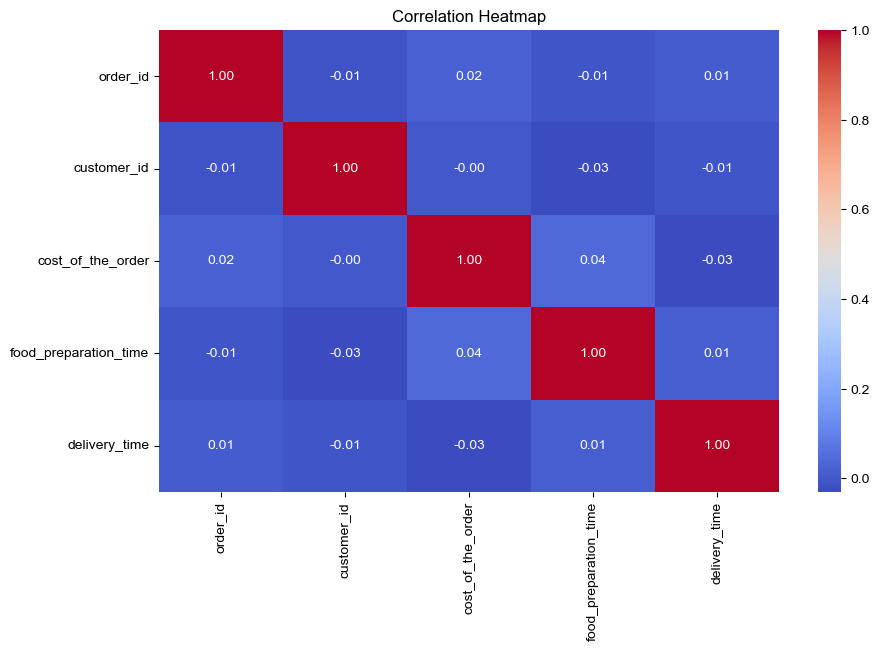

------------------Pairplot for cost of the order, food preparation time and delivery time---------------------



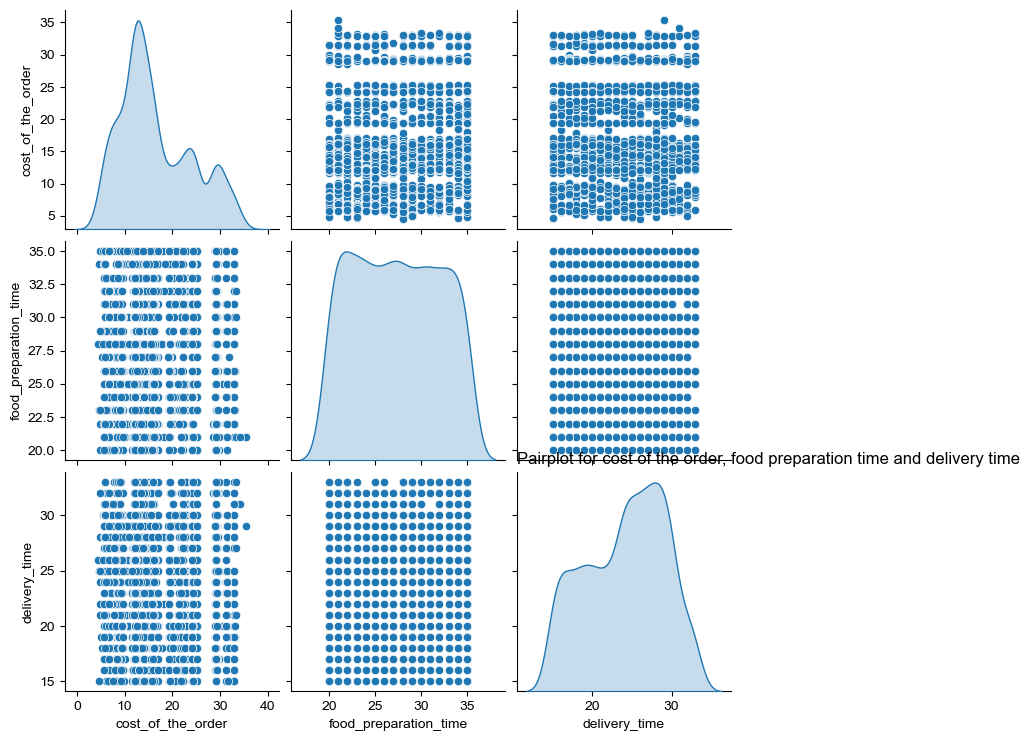

Observations from the pair plot 
1. Cost of order and food prep time: data is evenly distributed
2. Cost of order and delivery time : data is evenly distributed
3. Food prep time and delivery time : data is evenly distributed

Note: These columns order id and customer id are not relavant and they are not used in the analysis 

Bivariant analysis
 1 . Cost of order and rating


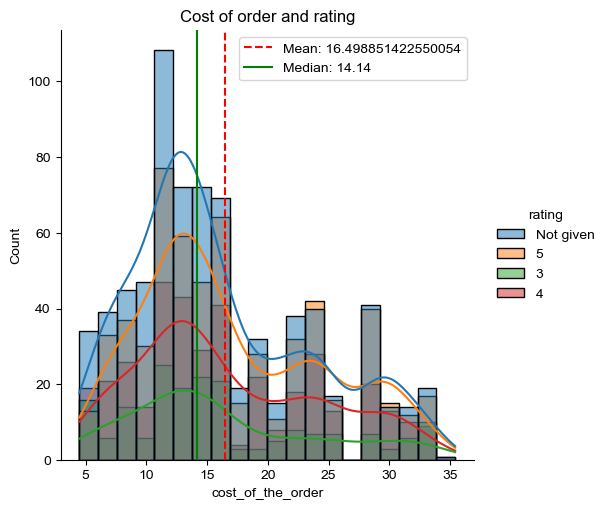

Observations from the Cost of order and rating 
1. higher cost of order cusine > 25 had least rating Not given
2. cusine cost between 10 and mean 16.4 had the most orders 
-----------------------------------------------------------------------------
 2 . Cost of order and cuisine_type


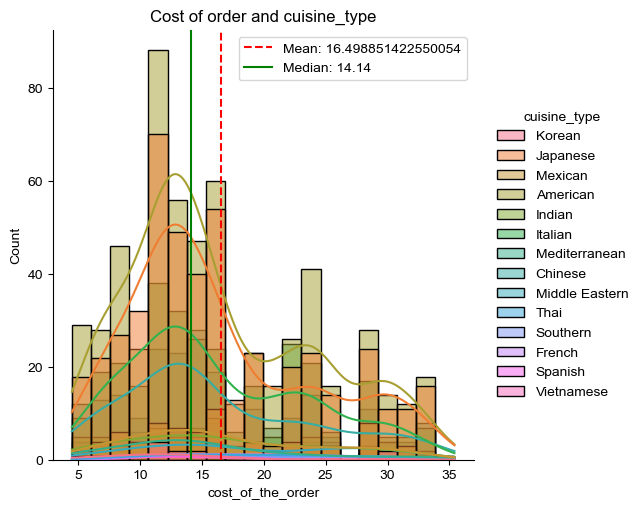

Observations from the Cost of order and cuisine_type 
1. higher cost of order cusine > 25 had least rating Not given

-----------------------------------------------------------------------------
 3 . Cost of order and day_of_the_week


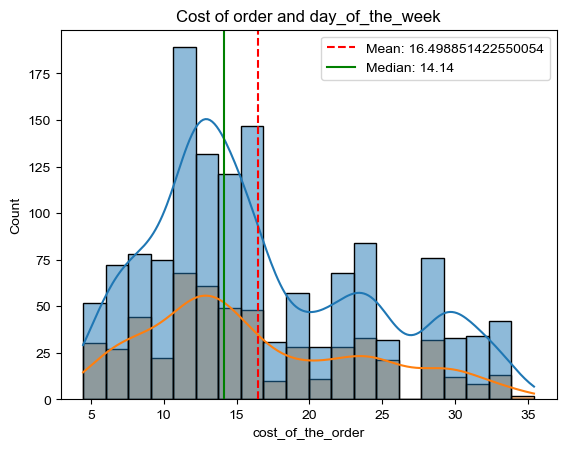

Observations from the Cost of order and day_of_the_week 
1. There are more orders on weekend
2. There are more order on weekend cost of order between 11 and 17

-----------------------------------------------------------------------------


In [144]:
# Generate a heatmap for the correlation matrix of numerical columns in the dataframe
plt.figure(figsize=(10, 6))

#get the numerical and categorical columns
fh_numerical_columns = fh_original.select_dtypes(include=[np.number])
fh_category_columns = fh_original.select_dtypes(exclude=[np.number])

print('Multivariate Analysis:Correlation Matrix \n')
correlation_matrix = fh_numerical_columns.corr()  
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if correlation_matrix.loc[index, column] > 0.001 and index != column:
            pos_column = index 
            pos_correlation = correlation_matrix.loc[index, column]
            if pos_correlation < correlation_matrix.loc[index, column]:
                pos_column = index 
                pos_correlation = correlation_matrix.loc[index, column]
            print(f"Correlation between {index} and {column}: {correlation_matrix.loc[index, column]}")
        elif correlation_matrix.loc[index, column] < -0.001 and index != column:
            neg_column = index 
            neg_correlation = correlation_matrix.loc[index, column]
            if neg_correlation < correlation_matrix.loc[index, column]:
                neg_column = index 
                neg_correlation = correlation_matrix.loc[index, column]
            print(f"Negative Correlation between {index} and {column}: {correlation_matrix.loc[index, column]}")
    print ("-------------------------------------------------------------------------------------------")
    print (f"{column} is higly(positive) correlated with {pos_column} with a correlation of {pos_correlation}")
    print (f"{column} is higly(negative) correlated with {neg_column} with a correlation of {neg_correlation}")
    print ("-------------------------------------------------------------------------------------------")

# Plot the heatmap
print ('------------------Correlation Heatmap---------------------\n')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



# pair plot for cost of the order, food preparation time and delivery time
print('------------------Pairplot for cost of the order, food preparation time and delivery time---------------------\n')
sns.pairplot(fh_numerical_columns[['cost_of_the_order', 'food_preparation_time', 'delivery_time']], diag_kind='kde')
#plt.figure(figsize=(10, 6))
plt.title("Pairplot for cost of the order, food preparation time and delivery time",loc='left')
plt.show()
print ('Observations from the pair plot \n' \
'1. Cost of order and food prep time: data is evenly distributed\n' \
'2. Cost of order and delivery time : data is evenly distributed\n' \
'3. Food prep time and delivery time : data is evenly distributed\n\n'\
'Note: These columns order id and customer id are not relavant and they are not used in the analysis \n')


median_value = fh_original['cost_of_the_order'].median()
mean_value = fh_original['cost_of_the_order'].mean()

print("Bivariant analysis")
print(" 1 . Cost of order and rating")
sns.displot(x=fh_original['cost_of_the_order'], hue = fh_original['rating'], bins=20, kde=True)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
plt.legend()
plt.title("Cost of order and rating")
plt.show()
print ('Observations from the Cost of order and rating \n' \
'1. higher cost of order cusine > 25 had least rating Not given\n'\
'2. cusine cost between 10 and mean 16.4 had the most orders ')
print('-----------------------------------------------------------------------------')



print(" 2 . Cost of order and cuisine_type")
sns.displot(x=fh_original['cost_of_the_order'], hue = fh_original['cuisine_type'], bins=20, kde=True)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
plt.legend()
plt.title("Cost of order and cuisine_type")
plt.show()
print ('Observations from the Cost of order and cuisine_type \n' \
'1. higher cost of order cusine > 25 had least rating Not given\n')
print('-----------------------------------------------------------------------------')


print(" 3 . Cost of order and day_of_the_week")
#sns.displot(x=fh_original['cost_of_the_order'], hue = fh_original['day_of_the_week'], bins=20, kde=True)
sns.histplot(x=fh_original['cost_of_the_order'], hue = fh_original['day_of_the_week'], bins=20, kde=True, legend=True)

plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value}')
plt.legend()
plt.title("Cost of order and day_of_the_week")
plt.show()
print ('Observations from the Cost of order and day_of_the_week \n' \
'1. There are more orders on weekend\n' \
'2. There are more order on weekend cost of order between 11 and 17\n')
print('-----------------------------------------------------------------------------')



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [145]:
# add a new column with numerical rating values
fh_original['rating_num'] = fh_original['rating'].map({'Not given': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5})
print ("Restaurents with more than 50 ratings greater than 4 are:")
fh_original[fh_original['rating_num'] > 4].groupby('restaurant_name')['order_id'].count()[lambda x: x > 50]



Restaurents with more than 50 ratings greater than 4 are:


restaurant_name
Shake Shack          60
The Meatball Shop    53
Name: order_id, dtype: int64

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [146]:
# Calculate additional costs based on conditions
fh_original['cost_25'] = np.where(fh_original['cost_of_the_order'] > 20, fh_original['cost_of_the_order'] * 0.25, 0)
fh_original['cost_15'] = np.where(fh_original['cost_of_the_order'] > 5, fh_original['cost_of_the_order'] * 0.15, 0)

# Calculate the new cost
fh_original['new_cost'] = fh_original['cost_of_the_order'] + fh_original['cost_25'] + fh_original['cost_15']

# Display the first 20 rows of the dataframe
#fh_original.head(20)

print(f"Total revnue using the new cost is {round(fh_original['new_cost'].sum(),2)}")
 # check the sum of new cost

Total revnue using the new cost is 39694.36


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [147]:
TotalOrders = fh_original['order_id'].count()
deliveryTime = 60
print(f"Total number of orders : {TotalOrders}")
fh_original['TotalTime'] = fh_original['food_preparation_time'] + fh_original['delivery_time']
fh_original['TotalTime'] = fh_original['TotalTime'].astype(int)
TotalOrders_60 = fh_original['TotalTime'][fh_original['TotalTime'] > deliveryTime].count()
print(f"Total number of orders with total time greater than {deliveryTime} minutes: {TotalOrders_60}")
print(f"Percentage of orders with total time greater than {deliveryTime} minutes: {round((TotalOrders_60/TotalOrders)*100,2)}%")

Total number of orders : 1898
Total number of orders with total time greater than 60 minutes: 200
Percentage of orders with total time greater than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [148]:
# convert day_of_the_week to numerical values
# weekday = 1 , weekend = 0
fh_original['day_type'] = fh_original['day_of_the_week'].map({'Weekday': 1, 'Weekend': 0}).astype(int)

wk_delivery_time = fh_original[fh_original['day_type']== 1]['delivery_time'].mean()
wkend_delivery_time = fh_original[fh_original['day_type']== 0]['delivery_time'].mean()
print(f"Average delivery time on weekdays: {round(wk_delivery_time,2)} minutes")
print(f"Average delivery time on weekends: {round(wkend_delivery_time,2)} minutes")  
difference = wk_delivery_time - wkend_delivery_time
comparison = "greater" if difference > 0 else "less"
print(f'Average delivery time on weekdays is {round(difference, 2)} {comparison} than the average delivery time on weekends')
difference = wkend_delivery_time - wk_delivery_time
comparison = "greater" if difference > 0 else "less"
print(f'Average delivery time on weekend days is {round(difference, 2)} {comparison} than the average delivery time on weekdays')


Average delivery time on weekdays: 28.34 minutes
Average delivery time on weekends: 22.47 minutes
Average delivery time on weekdays is 5.87 greater than the average delivery time on weekends
Average delivery time on weekend days is -5.87 less than the average delivery time on weekdays


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

In [149]:
treshold = 4
order_improve = fh_original['order_id'][fh_original['rating_num'] < treshold].count()
order_good = fh_original['order_id'][fh_original['rating_num'] > treshold-1 ].count()

rev_improve = round(fh_original['cost_of_the_order'][fh_original['rating_num'] < treshold].sum(),0)
rev_good = round(fh_original['cost_of_the_order'][fh_original['rating_num'] >= treshold].sum(),0)

print ("Conclusion:")
print(f"Cusine Greater than 3 --> orders : {order_good} , revenue :{rev_good} \n"\
      f"Cusine Less than 4    --> orders : {order_improve} , revenue :{rev_improve} \n" \
      "1. Restaurants with cusine rating greater than 3 have more orders and revenue\n" \
      "2. Restaurants with cusine rating less than 4 have less orders and revenue\n")

#ratings less than 2 
improve_treshold = .10 
order_less_than_2 = round(fh_original['order_id'][(fh_original['rating_num'] == 2) | (fh_original['rating_num'] == 3) ].count(),-1 )


print ("Recommendations:")
print(f"There are {order_less_than_2} orders with rating 2 and 3 \n" \
      f"Restaurants with cusine rating 2 and 3 have a better chances of improving rating to 4 \n" \
      f"from the analyis cusines with rating greater than 3 have better revenue \n" \
      f"A {improve_treshold*100} percent improvement {order_less_than_2* improve_treshold} orders to rating 4 or 5 is expected to improve revenue \n")
      





Conclusion:
Cusine Greater than 3 --> orders : 974 , revenue :16426.0 
Cusine Less than 4    --> orders : 924 , revenue :14889.0 
1. Restaurants with cusine rating greater than 3 have more orders and revenue
2. Restaurants with cusine rating less than 4 have less orders and revenue

Recommendations:
There are 190 orders with rating 2 and 3 
Restaurants with cusine rating 2 and 3 have a better chances of improving rating to 4 
from the analyis cusines with rating greater than 3 have better revenue 
A 10.0 percent improvement 19.0 orders to rating 4 or 5 is expected to improve revenue 



---